In [2]:
import os
import pygame
import numpy as np
import pandas as pd

from PIL import Image
from env.pok_env_gym_RLLib import PokemonEnv

pygame 2.5.2 (SDL 2.28.3, Python 3.11.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


objc[56179]: Class METAL_RenderData is implemented in both /Users/alexandreabela/Desktop/ECM/Cours/3A_ECM/PROJET3A/pokemon_env/lib/python3.11/site-packages/pygame/.dylibs/libSDL2-2.0.0.dylib (0x125561700) and /Users/alexandreabela/Desktop/ECM/Cours/3A_ECM/PROJET3A/pokemon_env/lib/python3.11/site-packages/sdl2dll/dll/SDL2.framework/Versions/A/SDL2 (0x16a5a53c8). One of the two will be used. Which one is undefined.
objc[56179]: Class METAL_TextureData is implemented in both /Users/alexandreabela/Desktop/ECM/Cours/3A_ECM/PROJET3A/pokemon_env/lib/python3.11/site-packages/pygame/.dylibs/libSDL2-2.0.0.dylib (0x125561750) and /Users/alexandreabela/Desktop/ECM/Cours/3A_ECM/PROJET3A/pokemon_env/lib/python3.11/site-packages/sdl2dll/dll/SDL2.framework/Versions/A/SDL2 (0x16a5a5418). One of the two will be used. Which one is undefined.
objc[56179]: Class SDLApplication is implemented in both /Users/alexandreabela/Desktop/ECM/Cours/3A_ECM/PROJET3A/pokemon_env/lib/python3.11/site-packages/pygame/.dyl

# 1. Jouer à la main et récupérer coordonnées à la main

In [2]:
from pygame.locals import QUIT, KEYDOWN, K_UP, K_DOWN, K_LEFT, K_RIGHT, K_a, K_b, K_q 

# Function to map keyboard inputs to actions
def get_action():
    for event in pygame.event.get():
        if event.type == QUIT:
            pygame.quit()
            exit()
        elif event.type == KEYDOWN:
            if event.key == K_UP:
                return 0  
            elif event.key == K_DOWN:
                return 1  
            elif event.key == K_LEFT:
                return 2  
            elif event.key == K_RIGHT:
                return 3 
            elif event.key == K_a:
                return 4  
            elif event.key == K_b:
                return 5  
    return 6  

In [2]:
from tqdm.notebook import tqdm

screenshot_dir = "screenshots"
if not os.path.exists(screenshot_dir):
    os.makedirs(screenshot_dir)

data_coords = pd.DataFrame(columns=['m', 'x', 'y'])

def play_game():
    pygame.init()
    
    env = PokemonEnv()

    env.reset()
    
    for _ in tqdm(range(5000)):
        
        action = np.random.randint(0,7)
        
        env.step(action)

    return env.data_info

In [3]:
data_info = play_game()

  0%|          | 0/5000 [00:00<?, ?it/s]

2024-03-26 16:27:23.167 Python[56109:6306043] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


In [4]:
data_info

,current_hp,levels,badges,pokedex_count,m,x,y
0,1.0,8,0,1,40,5,3
1,1.0,8,0,1,40,5,3
2,1.0,8,0,1,40,5,3
3,1.0,8,0,1,40,5,3
4,1.0,8,0,1,40,5,3
...,...,...,...,...,...,...,...
4995,1.0,8,0,1,0,13,14
4996,1.0,8,0,1,0,13,14
4997,1.0,8,0,1,0,13,14
4998,1.0,8,0,1,0,13,14


In [5]:
data_info.to_csv("./data_test.csv")

# 3. Afficher coordonnées endroits visités

In [1]:
import numpy as np
import pandas as pd

from PIL import Image

df_data = pd.read_csv("./data_test.csv")

In [52]:
import numpy as np
import pandas as pd

from PIL import Image

df_data = pd.read_csv("./data_test.csv")

def make_all_coords_arrays(df):
    return np.array(df[['x', 'y', 'm']].to_numpy().astype(np.uint8))

def game_coord_to_pixel_coord(
    x, y, map_idx, base_y):
    
    global_offset = np.array([1056-16*12, 331]) #np.array([790, -29])
    map_offsets = {
        0: np.array([0,0]), # pallet town
        1: np.array([-10, 72]), # viridian
        2: np.array([-10, 180]), # pewter
        12: np.array([0, 36]), # route 1
        13: np.array([0, 144]), # route 2
        14: np.array([30, 172]), # Route 3
        15: np.array([80, 190]), #Route 4
        33: np.array([-50, 64]), # route 22
        37: np.array([-9, 2]), # red house first
        38: np.array([-9, 25-32]), # red house second
        39: np.array([9+12, 2]), # blues house
        40: np.array([25-4, -6]), # oaks lab
        41: np.array([30, 47]), # Pokémon Center (Viridian City)
        42: np.array([30, 55]), # Poké Mart (Viridian City)
        43: np.array([30, 72]), # School (Viridian City)
        44: np.array([30, 64]), # House 1 (Viridian City)
        47: np.array([21,136]), # Gate (Viridian City/Pewter City) (Route 2)
        49: np.array([21,108]), # Gate (Route 2)
        50: np.array([21,108]), # Gate (Route 2/Viridian Forest) (Route 2)
        51: np.array([-35, 137]), # viridian forest
        52: np.array([-10, 189]), # Pewter Museum (floor 1)
        53: np.array([-10, 198]), # Pewter Museum (floor 2)
        54: np.array([-21, 169]), #Pokémon Gym (Pewter City)
        55: np.array([-19, 177]), #House with disobedient Nidoran♂ (Pewter City)
        56: np.array([-30, 163]), #Poké Mart (Pewter City)
        57: np.array([-19, 177]), #House with two Trainers (Pewter City)
        58: np.array([-25, 154]), # Pokémon Center (Pewter City)
        59: np.array([83, 227]), # Mt. Moon (Route 3 entrance)
        60: np.array([123, 227]), # Mt. Moon
        61: np.array([152, 227]), # Mt. Moon
        68: np.array([65, 190]), # Pokémon Center (Route 4)
        193: None # Badges check gate (Route 22)
    }
    if map_idx in map_offsets.keys():
        offset = map_offsets[map_idx]
    else:
        offset = np.array([0,0])
        x, y = 0, 0
    coord = global_offset + 16*(offset + np.array([x,y]))
    coord[1] = base_y - coord[1]
    return coord

def blend_overlay(background, over):
    al = over[...,3].reshape(over.shape[0], over.shape[1], 1)
    ba = (255-al)/255
    oa = al/255
    return (background[..., :3]*ba + over[..., :3]*oa).astype(np.uint8)

base_coords = make_all_coords_arrays(df_data)

main_map = np.array(Image.open('pokemap_full.png'))
start_bg = main_map.copy()
overlay = np.zeros_like(start_bg, dtype=np.uint8)

pixel_coords = np.zeros((base_coords.shape[0], 2))

for i, row in enumerate(base_coords):
    x, y, m = row
    x_img, y_img = game_coord_to_pixel_coord(x, y, m, overlay.shape[1])
    pixel_coords[i,:] = np.array([x_img, y_img]).astype(int)

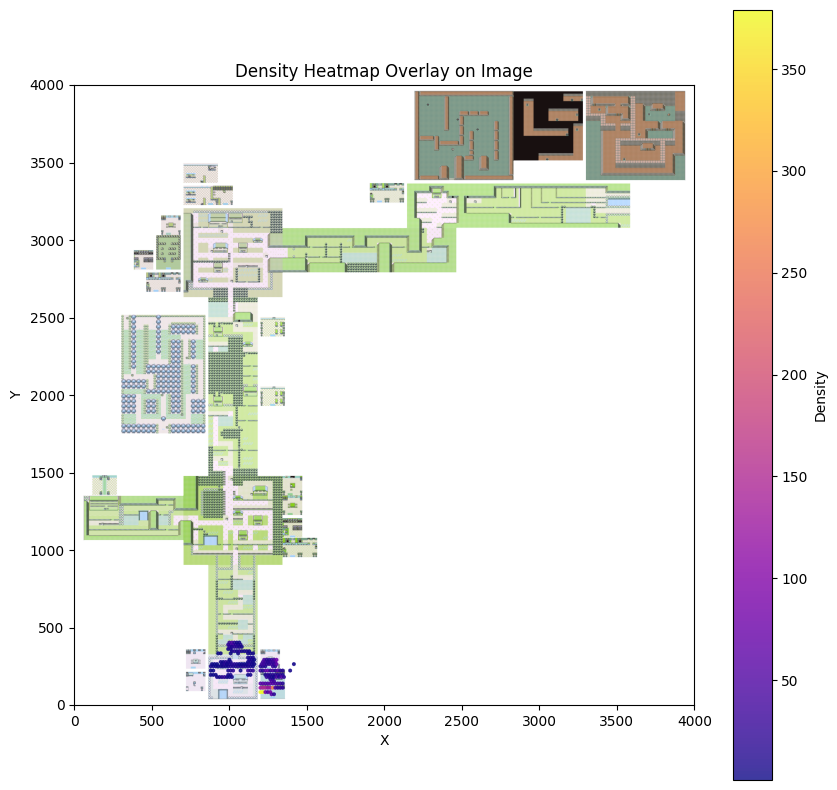

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have defined main_map and pixel_coords somewhere in your code

img_width = 4000
img_height = 4000

plt.figure(figsize=(10, 10))  # Adjust figure size as needed

# Plot the original image
plt.imshow(main_map, cmap='gray', extent=[0, img_width, 0, img_height])

# Plot the density of points as a heatmap
plt.hexbin(pixel_coords[:, 0], (img_height-pixel_coords[:, 1])-180, gridsize=250, cmap='plasma', alpha=0.8, mincnt=1, extent=[0, img_width, 0, img_height])  # Adjust gridsize as needed
plt.colorbar(label='Density')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Density Heatmap Overlay on Image')
plt.xlim(0, img_width)  # Ensure correct limits
plt.ylim(0, img_height)  # Ensure correct limits
plt.savefig('density_heatmap.png', dpi=300, bbox_inches='tight') 
plt.show()

In [54]:
plt.savefig('density_heatmap.png', dpi=300, bbox_inches='tight') 

<Figure size 640x480 with 0 Axes>